# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
The goal is to predict whether a customer will subscribe to a term deposit based on their demographic and marketing interaction data. This allows the bank to target future marketing campaigns more effectively.

In [6]:
# Drop all rows with missing values to ensure clean and complete data for modeling
df = df.dropna()
# Display the number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


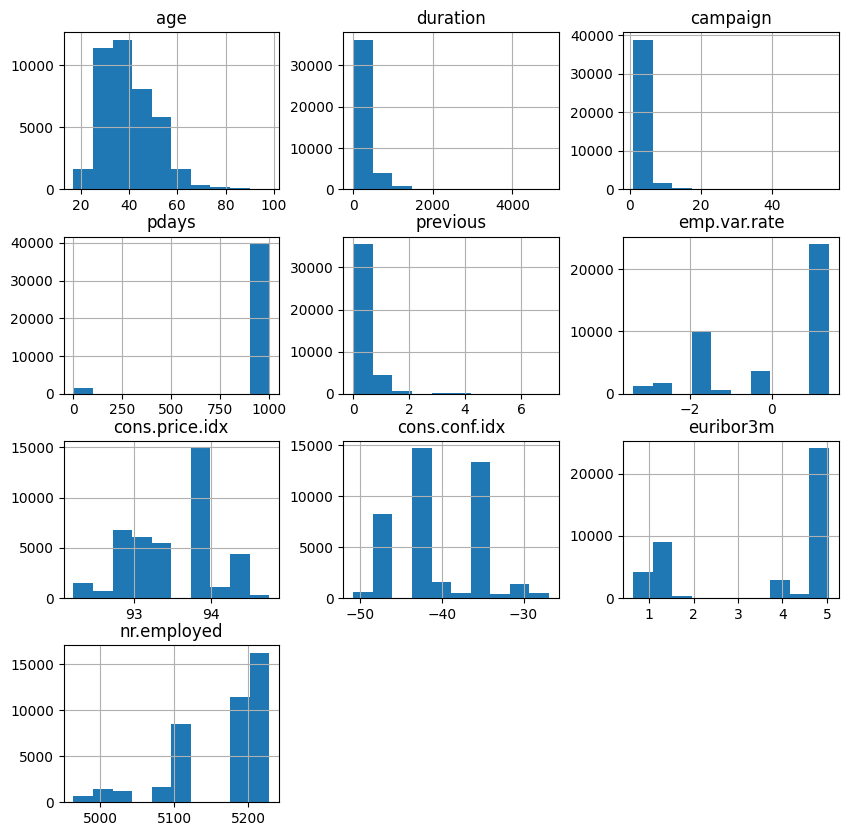

In [7]:
# Plot histograms for all numerical columns in the DataFrame to visualize their distributions
df.hist(figsize=(10, 10))
plt.show()

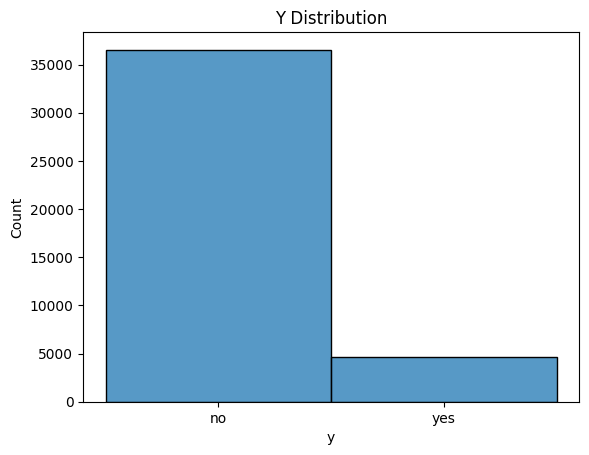

In [8]:
#Display a histogram of Y distribution
sns.histplot(df['y'])
plt.title('Y Distribution')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

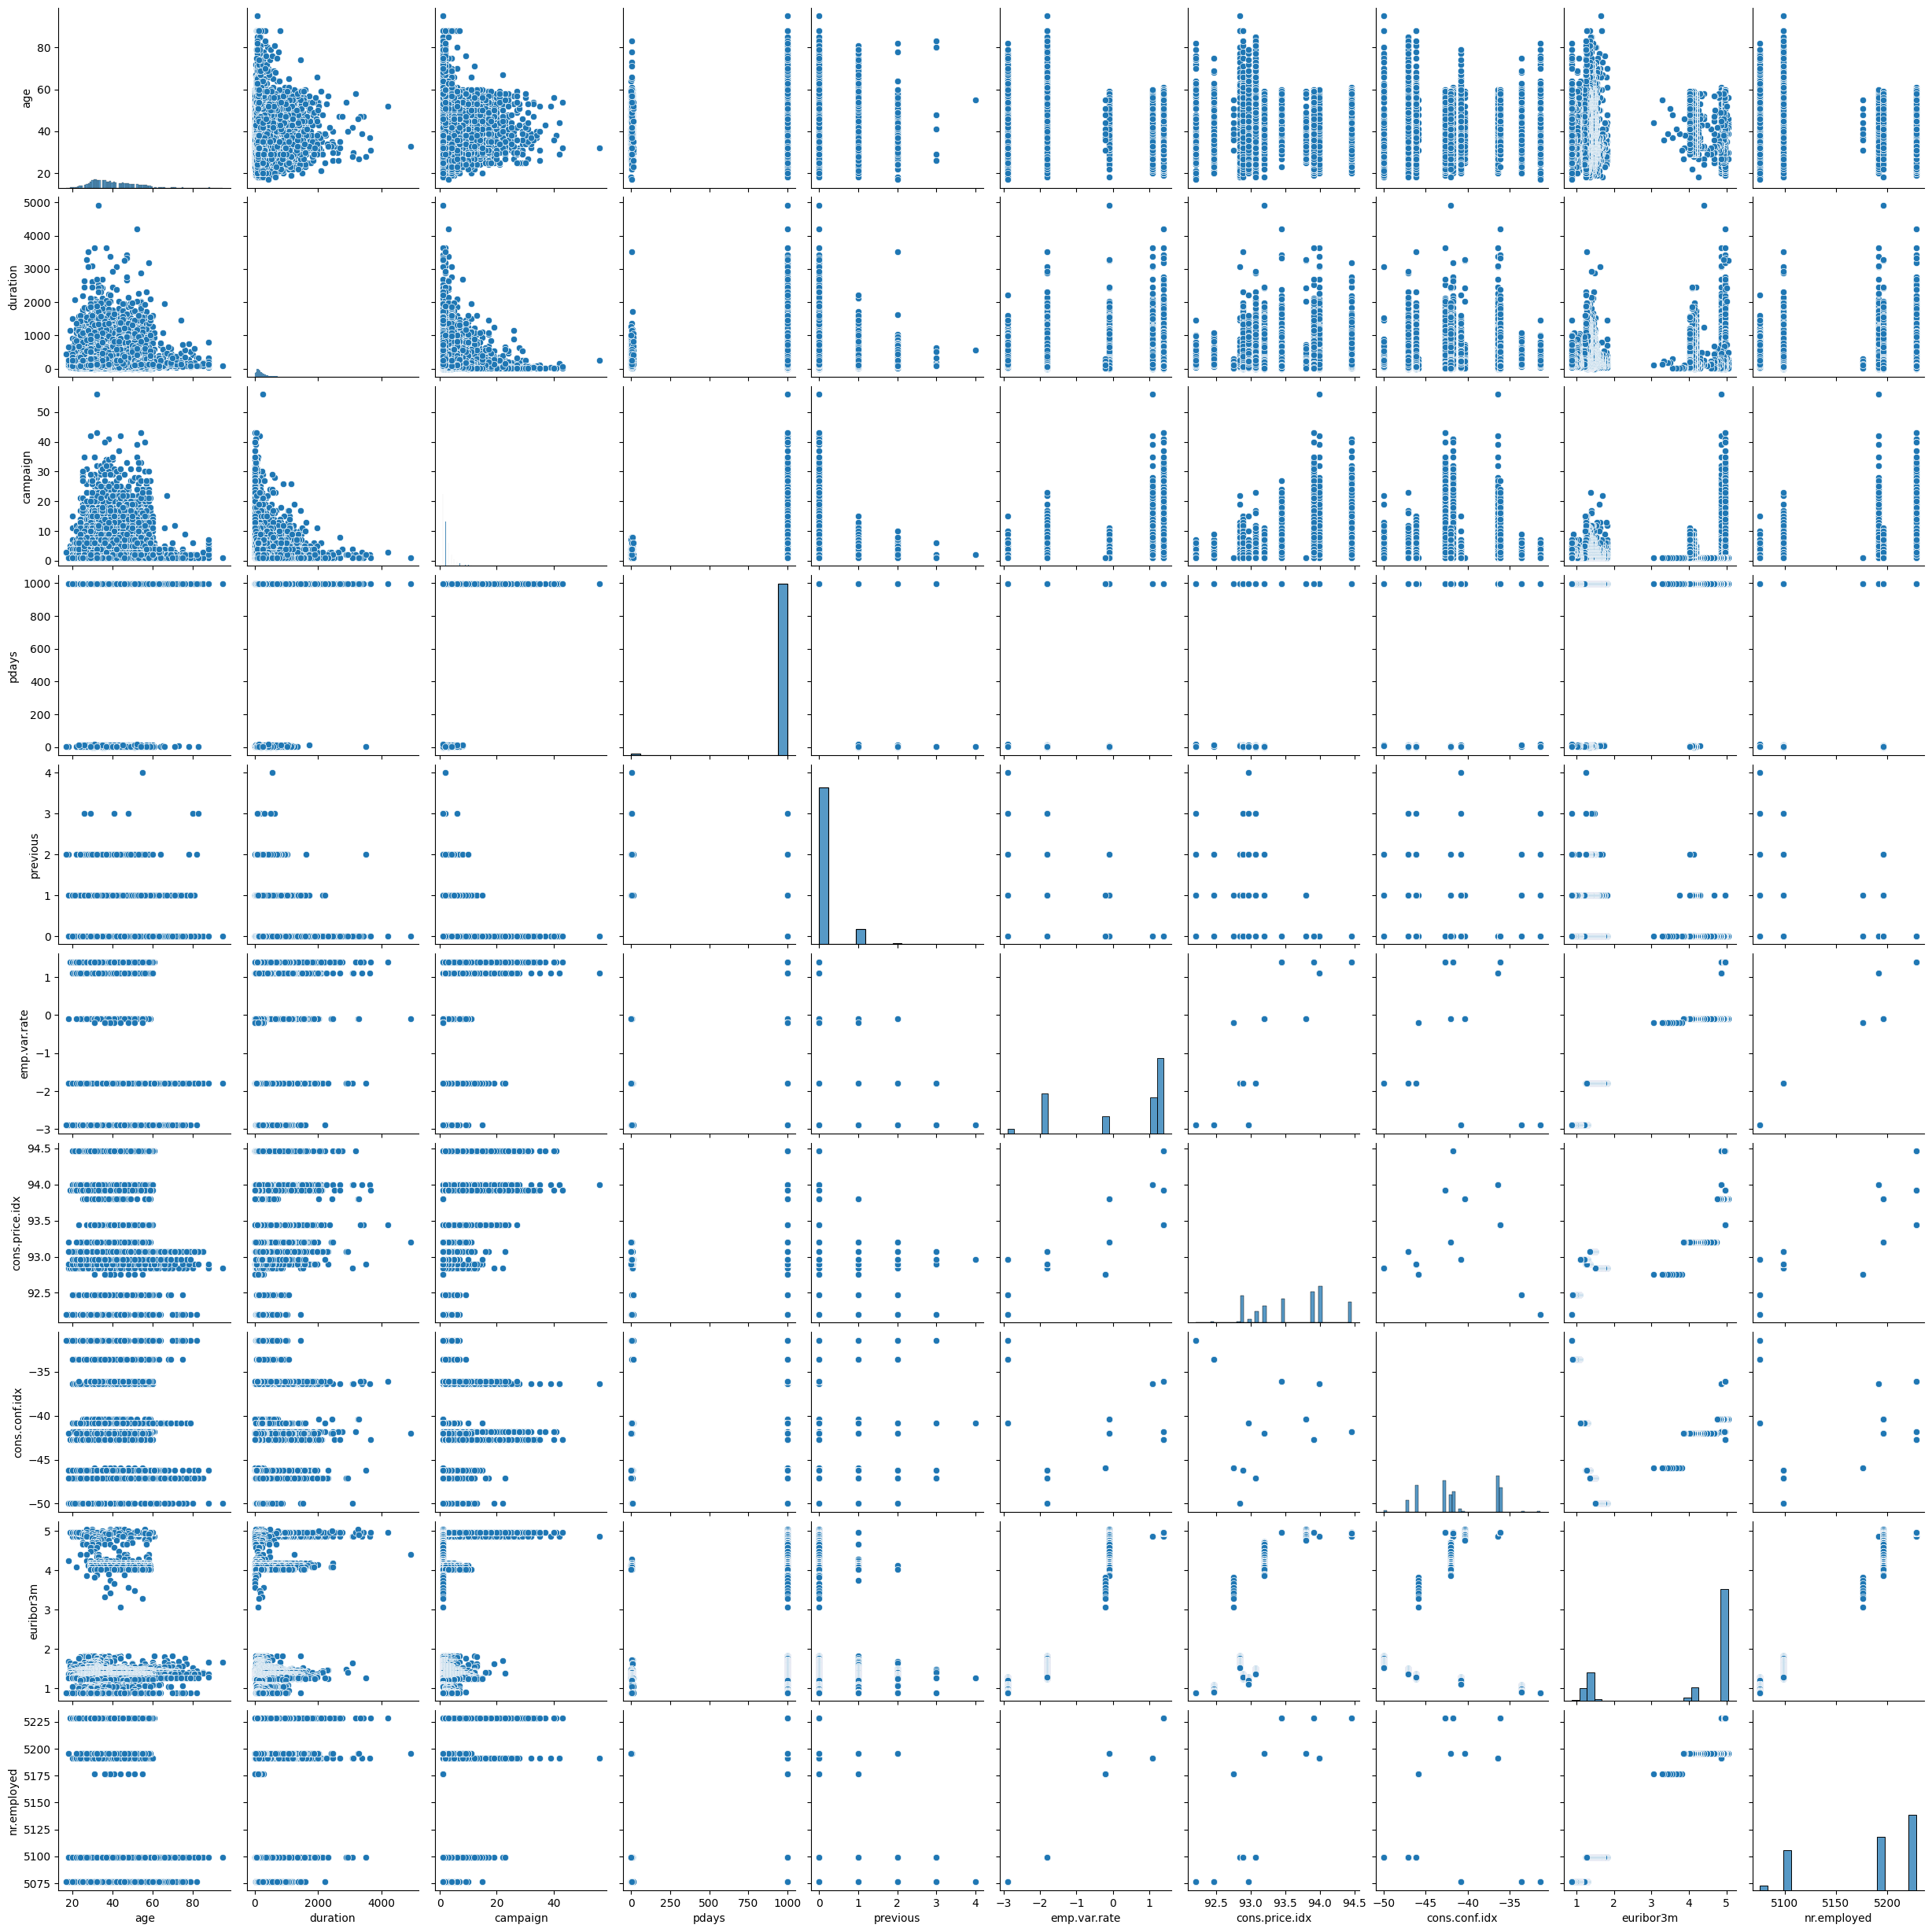

In [11]:
#Display pairplot
sns.pairplot(df)
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
#Encoding all categorical columns except target column 'y'
#df_encoded = df.copy()
#for col in df_encoded.select_dtypes(include='object').columns:
    #if col != 'y':
        #df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

#X = df_encoded.drop('y', axis=1)
#y = df_encoded['y']


df_encoded = df.copy()

# One-Hot Encode all categorical features except target
X = df_encoded.drop('y', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Label Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df_encoded['y'])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
#Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
#Baseline
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_dummy))

Baseline Accuracy: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
#Logistic regression
lr = LogisticRegression(solver='saga', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9085943190094683


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:
#Logistic Regression Train time, Train Accuracy and Test Accuracy
lor = LogisticRegression(solver='saga', max_iter=10000)
start_time = time.time()
lor.fit(X_train, y_train)
end_time = time.time()
train_time_lor = end_time - start_time
train_pred_lor = lor.predict(X_train)
test_pred_lor = lor.predict(X_test)
print("Logistic Regression Train Time:", train_time_lor)
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, train_pred_lor))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, test_pred_lor))

Logistic Regression Train Time: 175.07304692268372
Logistic Regression Train Accuracy: 0.9083763277693475
Logistic Regression Test Accuracy: 0.9085943190094683


In [20]:
#K nearest neigbours train time, train accuracy and test accuracy
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
train_time_knn = end_time - start_time
train_pred_knn = knn.predict(X_train)
test_pred_knn = knn.predict(X_test)
print("KNN Train Time:", train_time_knn)
print("KNN Train Accuracy:", accuracy_score(y_train, train_pred_knn))
print("KNN Test Accuracy:", accuracy_score(y_test, test_pred_knn))

KNN Train Time: 0.016278982162475586
KNN Train Accuracy: 0.9317450682852807
KNN Test Accuracy: 0.9014323865015781


In [21]:
#Decision tree train time, train accuracy and test accuracy
dt = DecisionTreeClassifier()
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()
train_time_dt = end_time - start_time
train_pred_dt = dt.predict(X_train)
test_pred_dt = dt.predict(X_test)
print("Decision Tree Train Time:", train_time_dt)
print("Decision Tree Train Accuracy:", accuracy_score(y_train, train_pred_dt))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, test_pred_dt))

Decision Tree Train Time: 0.4371776580810547
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.885773245933479


In [22]:
#SVM train time, train accuracy and test accuracy
svm = SVC()
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()
train_time_svm = end_time - start_time
train_pred_svm = svm.predict(X_train)
test_pred_svm = svm.predict(X_test)
print("SVM Train Time:", train_time_svm)
print("SVM Train Accuracy:", accuracy_score(y_train, train_pred_svm))
print("SVM Test Accuracy:", accuracy_score(y_test, test_pred_svm))

SVM Train Time: 25.981786727905273
SVM Train Accuracy: 0.8984522003034902
SVM Test Accuracy: 0.8945132313668366


In [23]:
#  Decision Tree using GridSearchCV
dtree_params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dtree = DecisionTreeClassifier(random_state=42)
grid_dtree = GridSearchCV(dtree, dtree_params, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dtree.best_params_)
print("Best CV Score:", round(grid_dtree.best_score_, 3))

Best Decision Tree Params: {'max_depth': 5, 'min_samples_split': 5}
Best CV Score: 0.914


In [24]:
#  KNN using GridSearchCV
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("Best CV Score:", round(grid_knn.best_score_, 3))

Best KNN Params: {'n_neighbors': 10, 'weights': 'uniform'}
Best CV Score: 0.909


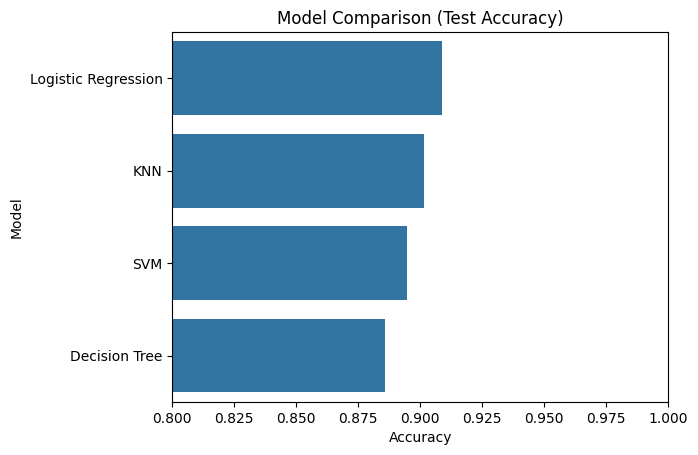

In [25]:
# Build a DataFrame with test accuracy
results_df = pd.DataFrame([
    ['Logistic Regression', 0.90859],
    ['KNN', 0.90143],
    ['Decision Tree', 0.88577],
    ['SVM', 0.89451],
], columns=['Model', 'Test Accuracy'])

# Plot
sns.barplot(x='Test Accuracy', y='Model', data=results_df.sort_values(by='Test Accuracy', ascending=False))
plt.title('Model Comparison (Test Accuracy)')
plt.xlim(0.8, 1.0)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [26]:
# Drop 'duration' to avoid data leakage
X = X.drop('duration', axis=1)

In [ ]:
#Grid search for svm
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM CV Score:", round(svm_grid.best_score_, 3))

In [ ]:
#Adjusting performance metric
y_pred_svm = svm_grid.predict(X_test)
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, pos_label='yes'))

##### Questions